In [2]:
# default_exp analysis

In [107]:
# export
import numpy as np
import math

In [8]:
import matplotlib.pyplot as plt

# Direct analysis on trajectories

## Angle calculation
Given a set of trajectories, calculate the angles between displacements

In [ ]:
#export 
def get_angle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang

def dataset_angles(trajs):
    angles = []
    for traj in trajs:
        for a, b, c in zip(traj[:, :-2].transpose(), traj[:, 1:-1].transpose(), traj[:, 2:].transpose()):
            angles.append(get_angle(a, b, c))
    return angles

# MSD based analysis 
This class collects all analysis of trajectories based on the mean squared displacement (MSD)

In [64]:
#export
class msd_analysis():
    def __init__():
        ''' Constructor of the class'''
        

    def tamsd(traj, t_lags):
        '''
        Calculates the time average mean squared displacement of a trajecotry traj
        at various time lags
        Inputs: - traj: trajectory to calculate TA-MSD
                - t_lags: time lags used for the TA-MSD
        Outputs: - TA-MSD
        '''
        tamsd = np.zeros_like(t_lags, dtype= float)
        for idx, t in enumerate(t_lags):        
            for p in range(len(traj)-t):
                tamsd[idx] += (traj[p]-traj[p+t])**2            
            tamsd[idx] /= len(traj)-t    
        return tamsd

    def get_diff_coeff(traj, t_lags = None):
        '''Calculates the diffusion coefficient of a trajectory by means of the linear
        fitting of the TA-MSD'''
        if not t_lags:
            N_t_lags = max(4, int(len(traj)*0.1))
            t_lags = np.arange(1, N_t_lags)

        tasmd = TAMSD(traj, t_lags)
        return np.polyfit(t_lags, tasmd, deg = 1)[0]/2

    def get_exponent(traj, t_lags = None):
        '''Calculates the anolaous of a trajectory by means of the linear
        fitting of the logarithm of the TA-MSD'''
        if not t_lags:
            N_t_lags = max(4, int(len(traj)*0.1))
            t_lags = np.arange(1, N_t_lags)

        tasmd = TAMSD(traj, t_lags)
        return np.polyfit(np.log(t_lags), np.log(tasmd), deg = 1)[0]
    
    

# Convex hull

In [91]:
# export
from scipy.spatial import ConvexHull

class ch_analysis():
    def __init__():
        '''Constructor of the class'''

    def get_changepoints(trajs, tau = 10, metric = 'volume'):
        CPs = []
        for traj in trajs:
            traj = np.array(traj)

            Sd = np.zeros(traj.shape[0]-2*tau)
            for k in range(traj.shape[0]-2*tau):
                if metric == 'volume':
                    Sd[k] = ConvexHull(traj[k:(k+2*tau)]).volume
                elif metric == 'area':
                    Sd[k] = ConvexHull(traj[k:(k+2*tau)]).area

            below_mean = Sd < Sd.mean()
            cp_traj = np.argwhere(below_mean[1:] != below_mean[:-1])+1
            CPs.append(cp_traj+tau)

        return CPs

Text(0, 0.5, '$S_d(n)$')

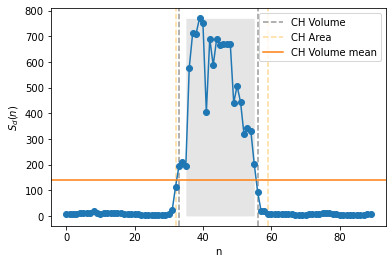

In [106]:
tau = 5
T = 100; on = 40; off = 60;

traj = np.random.randn(T, 2)
traj[on:off, :] = traj[on:off, :]*10
traj = traj.cumsum(0)

Sd = np.zeros(traj.shape[0]-2*tau)
for k in range(traj.shape[0]-2*tau):       
    Sd[k] = ConvexHull(traj[k:(k+2*tau)], ).volume
    
below_mean = Sd < Sd.mean()
CPs = np.argwhere(below_mean[1:] != below_mean[:-1])+1

CPs = ch_analysis.get_changepoints([traj], tau = tau)[0].flatten()-tau
CPs_a = ch_analysis.get_changepoints([traj], tau = tau, metric = 'area')[0].flatten()-tau

label_cp = 'CH Volume'
for cp in CPs:
    plt.axvline(cp, c = 'k', alpha = 0.4, ls = '--', label = label_cp)
    label_cp = ''
label_cp = 'CH Area'    
for cp in CPs_a:
    plt.axvline(cp, alpha = 0.4, ls = '--', c = 'orange', label = label_cp)
    label_cp = ''
    
plt.plot(Sd, '-o')
plt.axhline(Sd.mean(), label = 'CH Volume mean', c = 'C1',)
plt.legend()
plt.fill_betweenx(np.arange(Sd.max()), on-tau, off-tau, zorder = -1, alpha = 0.1, color = 'k', lw = 0)
plt.xlabel('n'); plt.ylabel(r'$S_d(n)$')
# plt.ylim(Sd.mean()-10, Sd.mean()+10)

# NBDEV Export

In [57]:
from nbdev.export import notebook2script
notebook2script()

Converted analysis_methods.ipynb.
Converted datasets_phenom.ipynb.
Converted datasets_theory.ipynb.
Converted models_phenom.ipynb.
Converted models_theory.ipynb.
Converted utils_challenge.ipynb.
Converted utils_trajectories.ipynb.
